In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.ticker as mtick
import json
import os
import csv

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [2]:
rawtweets=pd.read_csv('tweets.csv',header=None,encoding='ISO-8859-1')

In [25]:
rawtweets1=rawtweets.iloc[1200001:1600000,:]

In [26]:
rawtweets1.head()

,0,1,2,3,4,5
1200001,4,1985419430,Sun May 31 17:04:02 PDT 2009,NO_QUERY,themoderngal,@roxyreeb You need a new hobby. Wanna train fo...
1200002,4,1985419460,Sun May 31 17:04:02 PDT 2009,NO_QUERY,rachfran,"loooves my friends, and as of today loves the ..."
1200003,4,1985419474,Sun May 31 17:04:02 PDT 2009,NO_QUERY,giiirly,the hills last one D:
1200004,4,1985419514,Sun May 31 17:04:02 PDT 2009,NO_QUERY,ilovepushplaay,teamviewer is entertaining
1200005,4,1985419535,Sun May 31 17:04:03 PDT 2009,NO_QUERY,folieameghan,i intensely miss my bestfriends! much love!! ...


In [27]:
rawtweets1.to_csv('C:\\Users\\Lighta\\Desktop\\Data_Analytics\\Course5\\Task4\\rawtweets4.csv',header=False, index=False, mode="w")

#To save .json file
with open('C:\\Users\\Lighta\\Desktop\\Data_Analytics\\Course5\\Task4\\rawtweets1.json',"w") as f:
    json.dump(rawtweets1,f)

EDA

In [10]:
rawtweets.head(10)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [9]:
rawtweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
tweets=rawtweets.copy()

In [6]:
#Rename columns
old_col=[0,1,2,3,4,5]
new_col=['Label','ID','Date','Query','User','Text']
tweets[new_col]=tweets[old_col]
tweets=tweets.drop(old_col,axis=1)
tweets.head()

,Label,ID,Date,Query,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
#Format Date
tweets['Date']=pd.to_datetime(tweets['Date'])

C:\Users\Lighta\Anaconda3\envs\Explorer\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [8]:
tweets['Date'].dt.tz_localize('America/Los_Angeles')

0         2009-04-06 22:19:45-07:00
1         2009-04-06 22:19:49-07:00
2         2009-04-06 22:19:53-07:00
3         2009-04-06 22:19:57-07:00
4         2009-04-06 22:19:57-07:00
                     ...           
1599995   2009-06-16 08:40:49-07:00
1599996   2009-06-16 08:40:49-07:00
1599997   2009-06-16 08:40:49-07:00
1599998   2009-06-16 08:40:49-07:00
1599999   2009-06-16 08:40:50-07:00
Name: Date, Length: 1600000, dtype: datetime64[ns, America/Los_Angeles]

In [9]:
tweets=tweets.assign(Count=1)

In [24]:
tweets.tail()

,Label,ID,Date,Query,User,Text,Count
1599995,4,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,1
1599996,4,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,1
1599997,4,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,1
1599998,4,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,1
1599999,4,2193602129,2009-06-16 08:40:50,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...,1


In [11]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Label   1600000 non-null  int64         
 1   ID      1600000 non-null  int64         
 2   Date    1600000 non-null  datetime64[ns]
 3   Query   1600000 non-null  object        
 4   User    1600000 non-null  object        
 5   Text    1600000 non-null  object        
 6   Count   1600000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 85.4+ MB


In [12]:
#To string
#tweets['Label'].to_string()

In [13]:
#str. works without type conversion
tweets['Text'].str.len()

0          115
1          111
2           89
3           47
4          111
          ... 
1599995     56
1599996     78
1599997     57
1599998     65
1599999     62
Name: Text, Length: 1600000, dtype: int64

In [14]:
tweetsample=tweets.sample(n=50,axis=0)
tweetsample.head()

,Label,ID,Date,Query,User,Text,Count
698174,0,2254037948,2009-06-20 09:07:53,NO_QUERY,panthergirl1016,i dont have any followers,1
475549,0,2177636261,2009-06-15 06:26:57,NO_QUERY,BoertjeHarm,@DenyceLawton Thank you for not reacting...,1
1517644,4,2175864640,2009-06-15 02:13:14,NO_QUERY,Dixipoledancer,"Breakfast time, I want strawberrys Yuuummmy!",1
1580159,4,2190033025,2009-06-16 01:34:39,NO_QUERY,belladore,I'm at work,1
467140,0,2175714345,2009-06-15 01:46:54,NO_QUERY,FelicityBall,is fighting flu Just want to stay in bed.,1


In [32]:
tweets['Date'].describe()

count                 1600000
unique                 774363
top       2009-06-15 12:53:14
freq                       20
first     2009-04-06 22:19:45
last      2009-06-25 10:28:31
Name: Date, dtype: object

In [16]:
#Pivot by sentiment
table=pd.pivot_table(tweets,values='Count',index='Label',aggfunc=np.sum,margins=True)
rec=pd.DataFrame(table.to_records())
rec

,Label,Count
0,0,800000
1,4,800000
2,All,1600000


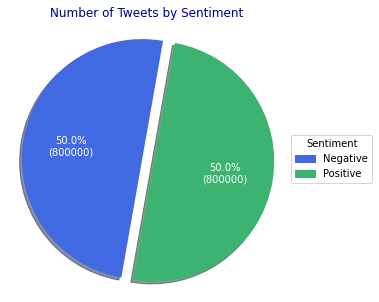

In [17]:
#Number of tweets for each level of sentiment
#fig=px.pie(tweetsample,values='Count',names='Label')
#fig.update_layout(title_text="Number of Tweets by Sentiment", title={'x':0.5,'yanchor':'top'},legend_title_text='Sentiment')
#fig.update_traces(textinfo='percent + value')
#fig.show()
#SubTotal=tweetsample.groupby(['Label']).agg({'Count':'sum'})

SentCount=rec.loc[0:1,'Count']
labels='Negative','Positive'
explode=(0, 0.1)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax=plt.subplots(figsize=(5, 5))
wedges=ax.pie(SentCount,explode=explode,colors=['royalblue','mediumseagreen'], autopct=lambda pct: func(pct, SentCount), shadow=True,startangle=80,textprops=dict(color="w"))
blue_patch = mpatches.Patch(color='royalblue', label='Negative')
green_patch=mpatches.Patch(color='mediumseagreen',label='Positive')
ax.legend(handles=[blue_patch,green_patch], title="Sentiment", loc="center left", bbox_to_anchor=(1,0,0.5,1))
ax.axis('equal')
ax.set_title("Number of Tweets by Sentiment",color='darkblue')
plt.show()

In [18]:
#Top 5 users tweeting for each sentiment - Pivot
table5top=pd.pivot_table(tweets,index=["Label", "User"],values=["Count"],aggfunc=np.sum)

table5topNeg=table5top.query('Label==["0"]')
table5topPos=table5top.query('Label==["4"]')

rec5topNeg=pd.DataFrame(table5topNeg.to_records()).sort_values(['Count'],ascending=False).head(5)
rec5topPos=pd.DataFrame(table5topPos.to_records()).sort_values(['Count'],ascending=False).head(5)
#rec5top=rec5topNeg.append(rec5topPos)
rec5topPos

,Label,User,Count
366625,4,what_bugs_u,246
31022,4,DarkPiano,231
132073,4,VioletsCRUK,218
358974,4,tsarnick,212
254540,4,keza34,211


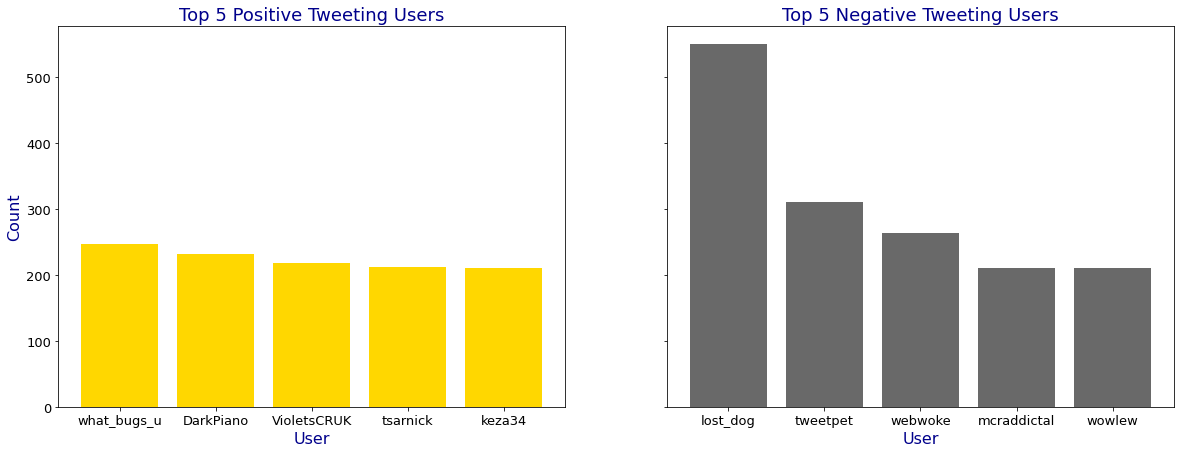

In [38]:
#Top 5 users tweeting for each sentiment - chart
fig, axs = plt.subplots(1, 2, figsize=(20, 7),sharey=True)

axs[0].bar(rec5topPos['User'], rec5topPos['Count'],color='gold')
axs[0].set_ylabel('Count',fontsize=16, color='darkblue')
axs[0].set_xlabel('User',fontsize=16, color='darkblue')
axs[0].set_title('Top 5 Positive Tweeting Users',fontsize=18, color='darkblue')

axs[1].bar(rec5topNeg['User'], rec5topNeg['Count'], color='dimgrey')
axs[1].set_xlabel('User',fontsize=16, color='darkblue')
axs[1].set_title('Top 5 Negative Tweeting Users',fontsize=18, color='darkblue')

plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

In [20]:
#Average length of the top 5 tweets for each level of sentiment - Pivot
table5toptw=pd.pivot_table(tweets,index=["Label", "Text"],values=["Count"],aggfunc=np.sum)

table5toptwNeg=table5toptw.query('Label==["0"]')
table5toptwPos=table5toptw.query('Label==["4"]')

rec5toptwNeg=pd.DataFrame(table5toptwNeg.to_records()).sort_values(['Count'],ascending=False).head(5)
rec5toptwPos=pd.DataFrame(table5toptwPos.to_records()).sort_values(['Count'],ascending=False).head(5)
Avrg_Tweet_LengthNeg=rec5toptwNeg['Text'].str.len().mean()
Avrg_Tweet_LengthPos=rec5toptwPos['Text'].str.len().mean()
Avrg_Tweet_LengthPos

46.6

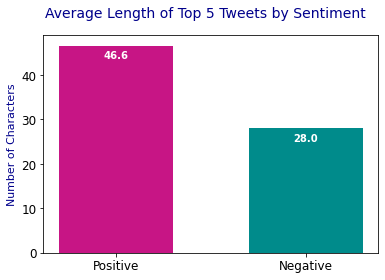

In [21]:
#Average length of the top 5 tweets for each level of sentiment - chart
avrg_length=[Avrg_Tweet_LengthPos,Avrg_Tweet_LengthNeg]
fig, ax=plt.subplots()
chart1=ax.bar(['Positive','Negative'],avrg_length, width=0.6, color=['mediumvioletred','darkcyan'])
fig.suptitle('Average Length of Top 5 Tweets by Sentiment',fontsize=14, color='darkblue')
ax.set_ylabel('Number of Characters',fontsize=11, color='darkblue')

def autolabel(rects):
    #Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x()+0.3, height-4),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=10, color="white", fontweight="bold")
autolabel(chart1)

In [22]:
#Timeframe for each level of sentiment - Subset
tweetTimePos=tweets[tweets['Label']==4]
tweetTimeNeg=tweets[tweets['Label']==0]
tweetTimeNeg.head()

,Label,ID,Date,Query,User,Text,Count
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,1
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,1
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,1
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",1


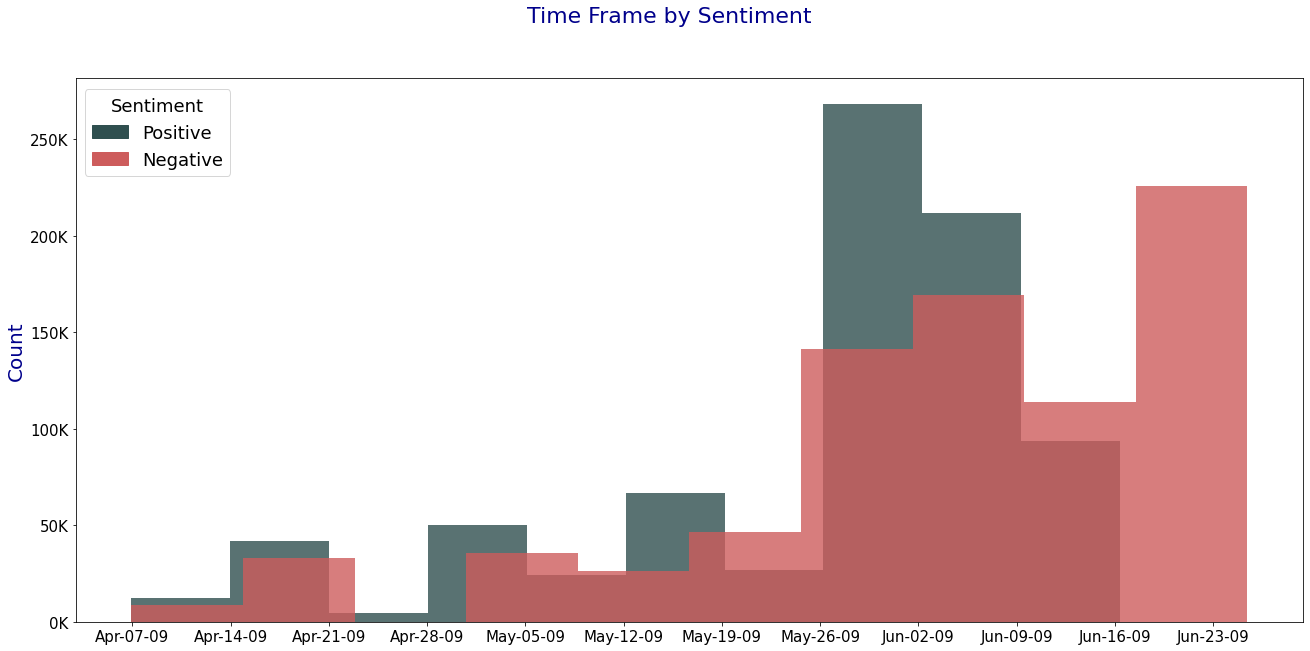

In [36]:
#Time frame for each level of sentiment - chart

fig, ax=plt.subplots(figsize=(22,10))

ax.hist(tweetTimePos['Date'], color="darkslategrey", alpha=0.8)
ax.hist(tweetTimeNeg['Date'], color="indianred", alpha=0.8)

fig.suptitle('Time Frame by Sentiment',fontsize=22, color='darkblue')
ax.set_ylabel('Count',fontsize=20, color='darkblue')

def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(thousands))

plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

date_form=DateFormatter("%b-%d-%y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

grey_patch = mpatches.Patch(color='darkslategrey', label='Positive')
red_patch=mpatches.Patch(color='indianred',label='Negative')
ax.legend(handles=[grey_patch,red_patch], title="Sentiment",title_fontsize=18, loc="center left", bbox_to_anchor=(0,0.4,2,1),fontsize=18)

plt.show()